In [2]:
# in this code we will use Linear Fit to predict the survival of the titanic passengers
# we will use the titanic dataset from kaggle
# we will use the following libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# read the train, test and gender_submission datasets
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
gender_sub = pd.read_csv("./gender_submission.csv")


In [4]:
# clean the training data
# replace the name column with the number of the characters in the name
train['Name'] = train['Name'].apply(lambda x: len(x))


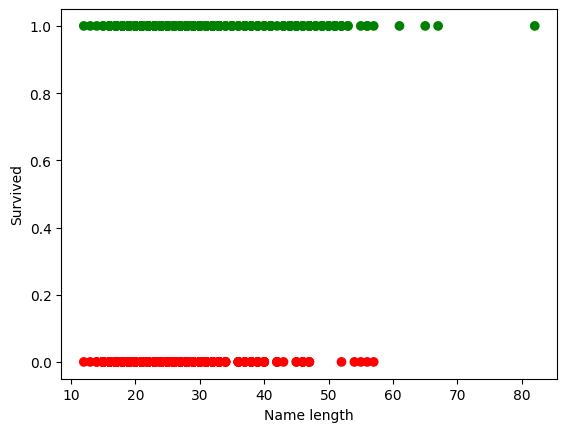

In [5]:
# vsualize if there is any correlation between the name length and the survival
# make name color red if the passenger died and green if the passenger survived
colors = []
for i in train['Survived']:
    if i == 0:
        colors.append('red')
    else:
        colors.append('green')
plt.scatter(train['Name'], train['Survived'], color=colors)
plt.xlabel('Name length')
plt.ylabel('Survived')
plt.show()





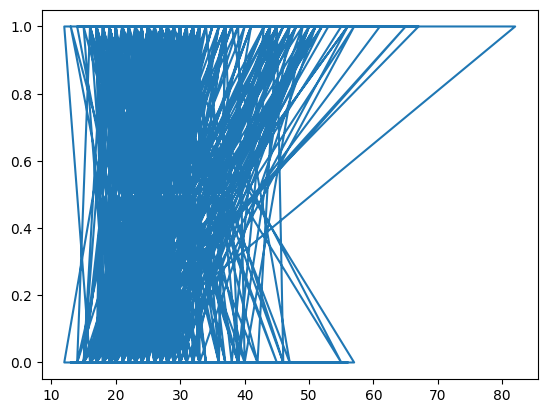

In [6]:
# use a line plot to visualize the correlation between the name length and the survival
plt.plot(train['Name'], train['Survived'])
plt.show()

In [7]:
# find the average name length of the passengers who survived
survived = train[train['Survived'] == 1]
survived['Name'].mean()
print(survived['Name'].mean())

# find the average name length of the passengers who died
died = train[train['Survived'] == 0]
died['Name'].mean()
print(died['Name'].mean())

# find the correlation between the name length and the survival
train['Name'].corr(train['Survived'])

#  find the median name length of the passengers who survived
survived['Name'].median()
print(survived['Name'].median())

# find the median name length of the passengers who died
died['Name'].median()
print(died['Name'].median())

# seems like there is a correlation between the name length and the survival

30.871345029239766
24.531876138433514
28.5
24.0


In [8]:
# replace male as 1 and female as 0 in the Sex column of the training data
train['Sex'] = train['Sex'].apply(lambda x: 0 if x == "female" else 1)

In [9]:
# Check if there is a corrolation between embarked and survival
# replace S as 0, C as 1 and Q as 2 in the Embarked column of the training data
# replace the embarked column with the average of 0, 1 and 2 if ist value is nan
train['Embarked'] = train['Embarked'].apply(lambda x: 0 if x == "S" else 1 if x == "C" else 2 if x == "Q" else 3)
train['Embarked'].corr(train['Survived'])
print(train['Embarked'].corr(train['Survived']))
# seems like there is a little correlation between the embarked and the survival

# drop the cabin column, the ticket column and the passenger id column
train = train.drop(['Cabin', 'Ticket', 'PassengerId'], axis=1)

# replace nan values in the age column with the average age
train['Age'] = train['Age'].fillna(train['Age'].mean())

# replace nan values in the embarked column with the average embarked
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mean())

# replace nan values in the fare column with the average fare
train['Fare'] = train['Fare'].fillna(train['Fare'].mean())


0.11802613631247463


In [10]:
# Check if there is a correlation between the age and the survival
train['Age'].corr(train['Survived'])
print(train['Age'].corr(train['Survived']))

# Check if there is a correlation between the fare and the survival
train['Fare'].corr(train['Survived'])
print(train['Fare'].corr(train['Survived']))

# check if there is a correlation between SibSp and the survival
train['SibSp'].corr(train['Survived'])
print(train['SibSp'].corr(train['Survived']))

# check if there is a correlation between Parch and the survival
train['Parch'].corr(train['Survived'])
print(train['Parch'].corr(train['Survived']))

# check if there is a correlation between Pclass and the survival
train['Pclass'].corr(train['Survived'])
print(train['Pclass'].corr(train['Survived']))

-0.06980851528714314
0.2573065223849625
-0.035322498885735645
0.08162940708348372
-0.33848103596101475


In [11]:
# crate y_train and x_train numpy arrays
y_train = train['Survived'].values
x_train = train.drop(['Survived'], axis=1).values

In [12]:
# normalize the x_train data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)

In [13]:
# use matrix multiplication to find the best theta
x_train = np.c_[np.ones(x_train.shape[0]), x_train]
theta = np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)


In [14]:
# use the theta to predict the survival of the passengers in the test dataset
# clean the test data
# replace the name column with the number of the characters in the name
test['Name'] = test['Name'].apply(lambda x: len(x))

# replace embarked column with the average of 0, 1 and 2 if ist value is nan
test['Embarked'] = test['Embarked'].apply(lambda x: 0 if x == "S" else 1 if x == "C" else 2 if x == "Q" else 3)

# replace nan age values with the average age
test['Age'] = test['Age'].fillna(test['Age'].mean())

# replace nan embarked values with the average embarked
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mean())

# replace nan fare values with the average fare
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

# replace female sex values with 0 and male sex values with 1
test['Sex'] = test['Sex'].apply(lambda x: 0 if x == "female" else 1)

# drop the cabin column, the ticket column and the passenger id column
test = test.drop(['Cabin', 'Ticket', 'PassengerId'], axis=1)

# crate x_test numpy array
x_test = test.values

# normalize the x_test data
x_test = sc.fit_transform(x_test)

#  use the found best theta to predict the survival of the passengers in the test dataset
x_test = np.c_[np.ones(x_test.shape[0]), x_test]
y_test = x_test.dot(theta)


In [15]:
# replace the values in the y_test array with 1 if the value is greater than 0.5 and 0 if the value is less than 0.5
y_test = y_test > 0.5
y_test = y_test.astype(int)

# show the survival rate of the passengers in the test dataset
print(y_test.mean())

0.35406698564593303


In [16]:
# what is the survival rate of the passengers in the x_test dataset?

print(y_train.mean())

# create a submission file
test_df = pd.read_csv("./test.csv")
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": y_test
    })
submission.to_csv('submission.csv', index=False)


0.3838383838383838
